# Fake News Classifier

In [1]:
import pandas as pd 
df = pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [2]:
X = df.drop('label',axis =1)
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [3]:
y = df['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [5]:
df=df.dropna()

In [6]:
df.shape

(18285, 5)

In [7]:
messages=df.copy()
messages.reset_index(inplace=True)
messages

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [8]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [9]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [10]:
corpus[6]

'beno hamon win french socialist parti presidenti nomin new york time'

In [11]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
X.shape

(18285, 5000)

In [13]:
y=messages['label']

In [14]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [15]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [16]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [17]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MultinomialNB Algorithm 

In [19]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [20]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.901
Confusion matrix, without normalization


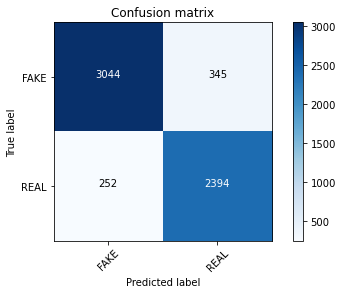

In [21]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Passive Aggressive Classifier Algorithm 

In [22]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.922
Confusion matrix, without normalization


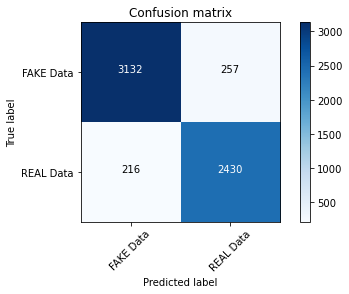

In [23]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

# Multinomial Classifier with Hyperparameter 

In [24]:
classifier=MultinomialNB(alpha=0.1)

In [25]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8906379453189727
Alpha: 0.1, Score : 0.9012427506213753
Alpha: 0.2, Score : 0.9015741507870754
Alpha: 0.30000000000000004, Score : 0.9015741507870754
Alpha: 0.4, Score : 0.9007456503728252
Alpha: 0.5, Score : 0.9005799502899752
Alpha: 0.6000000000000001, Score : 0.9015741507870754
Alpha: 0.7000000000000001, Score : 0.9019055509527755
Alpha: 0.8, Score : 0.9007456503728252
Alpha: 0.9, Score : 0.9009113504556753


In [26]:
## Get Features names
feature_names = cv.get_feature_names()
feature_names

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag',
 'acquit',
 'acquitt',
 'across',
 'act',
 'act like',
 'act new',
 'act new york',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'advis',
 'advis new',
 'advis new york',
 'advisor',
 'advoc',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afford care',
 'afford care act',
 'afghan',
 'afghanistan',
 'afraid',
 'africa',
 'african',
 'african american',
 'aftermath',
 'ag',
 'age',
 'age new',
 'age new york',
 'agenc',
 'agenda',
 'agenda breitbar

In [27]:
classifier.coef_[0]

array([ -9.10036605,  -8.6227385 ,  -9.10036605, ..., -10.79496178,
        -8.91464891,  -9.32862471])

In [28]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.000126376264419, 'trump'),
 (-4.287849914102974, 'hillari'),
 (-4.396366840720952, 'clinton'),
 (-4.899946945868169, 'elect'),
 (-5.176575820557189, 'new'),
 (-5.2347075860082, 'comment'),
 (-5.273945400633064, 'video'),
 (-5.386793987777445, 'war'),
 (-5.396799073738407, 'us'),
 (-5.4119969346478385, 'hillari clinton'),
 (-5.417114653084819, 'fbi'),
 (-5.4806617042015136, 'vote'),
 (-5.566232695514838, 'email'),
 (-5.578216062401935, 'world'),
 (-5.633992599859346, 'obama'),
 (-5.734478675432337, 'donald'),
 (-5.763072474799078, 'donald trump'),
 (-5.785067496384624, 'russia'),
 (-5.846201884877992, 'day'),
 (-5.862087842466802, 'america')]

In [29]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.79496177525616, 'abe'),
 (-10.79496177525616, 'abroad'),
 (-10.79496177525616, 'abus new'),
 (-10.79496177525616, 'abus new york'),
 (-10.79496177525616, 'act new'),
 (-10.79496177525616, 'act new york'),
 (-10.79496177525616, 'advic'),
 (-10.79496177525616, 'advis new'),
 (-10.79496177525616, 'advis new york'),
 (-10.79496177525616, 'afford care'),
 (-10.79496177525616, 'afford care act'),
 (-10.79496177525616, 'age new'),
 (-10.79496177525616, 'age new york'),
 (-10.79496177525616, 'agenda breitbart'),
 (-10.79496177525616, 'ail'),
 (-10.79496177525616, 'airbag'),
 (-10.79496177525616, 'aleppo new'),
 (-10.79496177525616, 'aleppo new york'),
 (-10.79496177525616, 'ali'),
 (-10.79496177525616, 'america breitbart'),
 (-10.79496177525616, 'america new york'),
 (-10.79496177525616, 'ami'),
 (-10.79496177525616, 'ami schumer'),
 (-10.79496177525616, 'amp'),
 (-10.79496177525616, 'ann'),
 (-10.79496177525616, 'ann coulter'),
 (-10.79496177525616, 'announc new'),
 (-10.79496177525616,